# Identify the Apparels
https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/  
**Aleksey Shipitsyn**    
**2019-08-12**

## Data reading and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


In [2]:
# data files names
main_folder = './Documents/Competitions/Identify the Apparels/'
train_folder = 'train_LbELtWX/'
test_folder = 'test_ScVgIM0/'

train_img_folder = 'train/'
test_img_folder = 'test/'

train_file = 'train.csv'
test_file = 'test.csv'
submission_file = 'sample_submission_I5njJSF.csv'


In [3]:
# read and check csv files
df_train = pd.read_csv(main_folder + train_folder + train_file, index_col='id') 
df_test = pd.read_csv(main_folder + test_folder + test_file, index_col='id') 
df_submission = pd.read_csv(main_folder + submission_file, index_col='id') 

pass

print('df_train SHAPE: {}'.format(df_train.shape))
print('df_test SHAPE: {}'.format(df_test.shape))
print('df_submission SHAPE: {}\n'.format(df_submission.shape))

print('df_train TYPES:\n{}\n'.format(df_train.dtypes))
print('df_test TYPES:\n{}\n'.format(df_test.dtypes))
print('df_submission TYPES:\n{}\n'.format(df_submission.dtypes))

print('df_train MISSING VALUES:\n{}\n'.format(df_train.isnull().sum()));
print('df_test MISSING VALUES:\n{}\n'.format(df_test.isnull().sum()));
print('df_submission MiSSING VALUES:\n{}'.format(df_submission.isnull().sum()))


df_train SHAPE: (60000, 1)
df_test SHAPE: (10000, 0)
df_submission SHAPE: (10000, 1)

df_train TYPES:
label    int64
dtype: object

df_test TYPES:
Series([], dtype: object)

df_submission TYPES:
label    int64
dtype: object

df_train MISSING VALUES:
label    0
dtype: int64

df_test MISSING VALUES:
Series([], dtype: float64)

df_submission MiSSING VALUES:
label    0
dtype: int64


In [4]:
df_train.head()

,label
id,
1,9
2,0
3,0
4,3
5,0


In [5]:
df_test.head()

""
id
60001
60002
60003
60004
60005


In [6]:
df_submission.head()

,label
id,
60001,0
60002,0
60003,0
60004,0
60005,0


In [7]:
# check if submission hash corresponds to test set
print('submission and test files match:  {}\n'.format(all(np.array(df_test.index == df_submission.index))))

# check id uniqueness
print('df_train, all unique id:  {}'.format(len(df_train.index.unique()) == df_train.shape[0]))
print('df_test, all unique id:  {}'.format(len(df_test.index.unique()) == df_test.shape[0]))
print('df_submission, all unique id:  {}'.format(len(df_submission.index.unique()) == df_submission.shape[0]))

submission and test files match:  True

df_train, all unique id:  True
df_test, all unique id:  True
df_submission, all unique id:  True


## Data preprocessing  

- Target balance
- Image feature extraction, HOG and Sobel features
- Split for training and validation subsets  


In [8]:
# Target classes are balanced
pd.crosstab(index=df_train.label, columns=['label'], normalize=False)

col_0,label
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


In [9]:
import imageio
import glob
from skimage import io, color, feature, filters, data


File location: ./Documents/Competitions/Identify the Apparels/train_LbELtWX/train/3975.png

image shape: (28, 28)


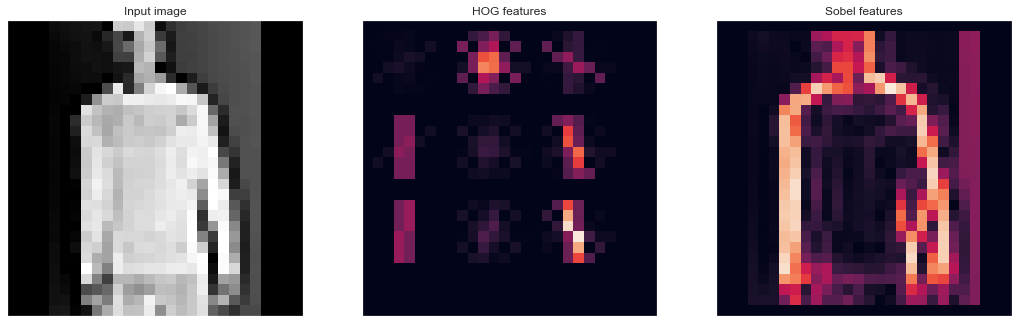

In [10]:
# One image features visualization
path = main_folder + train_folder + train_img_folder + "*.png"
images = glob.glob(path)
print('File location:', images[1] + '\n')

image = color.rgb2gray(imageio.imread(images[1]))
print('image shape:', image.shape)

# Hog features
hog_vec, hog_vis = feature.hog(image, visualize=True)

# Sobel features
edges = filters.sobel(image)

# visualize one image and features
fig, ax = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')

ax[1].imshow(hog_vis)
ax[1].set_title('HOG features');

ax[2].imshow(edges)
ax[2].set_title('Sobel features');



In [11]:
"""
# Hog and Sobel features for all images
hog_stack = np.vstack([ np.hstack( [feature.hog(color.rgb2gray(imageio.imread(im))), 
                                    filters.sobel(color.rgb2gray(imageio.imread(im))).ravel()] ) 
                       for im in images ])
hog_stack.shape 


# pixels as features 
hog_stack = np.vstack([ color.rgb2gray(imageio.imread(im)).ravel() for im in images ])
hog_stack.shape
"""

# Hog features for all images
hog_stack = np.vstack([ feature.hog(color.rgb2gray(imageio.imread(im))) for im in images ])
hog_stack.shape 


(60000, 81)

In [12]:
# matching sorted targets 
import re
pattern = re.compile('[0-9]+')
labels = np.array([re.findall(pattern, f) for f in images]).ravel().astype(int)

X = pd.DataFrame(hog_stack, index=labels)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
20037,0.171894,0.113754,0.106470,0.055849,0.033751,0.008893,0.007907,0.043832,0.013993,0.246132,...,0.129634,0.230236,0.062455,0.118795,0.013351,0.108264,0.059904,0.157017,0.132649,0.087331
3975,0.018304,0.001662,0.055951,0.000000,0.000000,0.005992,0.003039,0.014840,0.015344,0.256041,...,0.017798,0.256041,0.000000,0.012497,0.012323,0.038772,0.025361,0.111154,0.225365,0.256041
49081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035115,...,0.015858,0.029273,0.015255,0.022857,0.242051,0.308852,0.024468,0.033491,0.015753,0.025746
38678,0.288360,0.182486,0.084654,0.000000,0.004967,0.006576,0.000000,0.043320,0.074238,0.149354,...,0.021601,0.110600,0.033353,0.014592,0.012281,0.069396,0.026836,0.028677,0.020220,0.044719
59292,0.000402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098840,...,0.042821,0.165604,0.135110,0.244460,0.035046,0.001205,0.000000,0.000000,0.000000,0.022503


In [13]:
X.sort_index(inplace=True)
X.head()


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.057982,...,0.042429,0.070918,0.100365,0.072547,0.225248,0.111404,0.036474,0.033692,0.031818,0.047422
2,0.230470,0.137994,0.201274,0.065874,0.002424,0.0,0.002085,0.005818,0.003402,0.123226,...,0.144753,0.236857,0.000387,0.000490,0.000000,0.001558,0.001322,0.004171,0.007915,0.236857
3,0.004871,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.284097,...,0.098995,0.229994,0.036109,0.000574,0.001815,0.006495,0.001674,0.001722,0.050493,0.284097
4,0.128630,0.063913,0.188358,0.036969,0.001171,0.0,0.236493,0.111326,0.028523,0.236493,...,0.163996,0.104492,0.056769,0.016894,0.022240,0.081124,0.002619,0.163209,0.227034,0.236493
5,0.177803,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.148722,...,0.112022,0.262540,0.005904,0.020940,0.016783,0.000000,0.022229,0.018221,0.261925,0.230183


In [14]:
df_train.sort_index(inplace=True)
df_train.head()

,label
id,
1,9
2,0
3,0
4,3
5,0


In [15]:
# target
y = df_train.label

### Train data split for training and validation subsets

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=20000, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape


((40000, 81), (40000,), (20000, 81), (20000,))

## Modeling

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.model_selection import GridSearchCV


In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
rf_model = RandomForestClassifier(n_estimators=400, max_depth=4, n_jobs=8)
rf_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=8,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# grid search for RF
params = {'n_estimators': [200, 300, 400], 'max_depth': [3, 4]}
rf = RandomForestClassifier()
grid = GridSearchCV(rf, param_grid=params, cv=3, n_jobs=8)
grid.fit(X_train, y_train)
print(grid.best_params_)

rf_model = grid.best_estimator_


In [19]:
xgb_model = XGBRFClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, n_jobs=8)
xgb_model.fit(X_train, y_train)


XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=0.1,
                max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
                n_estimators=100, n_jobs=8, nthread=None,
                objective='multi:softprob', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, verbosity=1)

In [26]:
# grid searcgh for XGB
params = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [200, 300, 400], 'max_depth': [3, 4]}
xgb = XGBRFClassifier()
grid = GridSearchCV(xgb, param_grid=params, cv=3, n_jobs=8)
grid.fit(X_train, y_train)
print(grid.best_params_)

xgb_model = grid.best_estimator_


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}

### Evaluation

In [21]:
# Multi-class accuracy
from sklearn.metrics import accuracy_score


In [22]:
print('GaussianNB:')
print('Score for training set:', accuracy_score(y_train, nb_model.predict(X_train)))
print('Score for validation set:', accuracy_score(y_valid, nb_model.predict(X_valid))) 


GaussianNB:
Score for training set: 0.683775
Score for validation set: 0.68375


In [23]:
print('RandomForestClassifier:')
print('Score for training set:', accuracy_score(y_train, rf_model.predict(X_train)))
print('Score for validation set:', accuracy_score(y_valid, rf_model.predict(X_valid))) 


RandomForestClassifier:
Score for training set: 0.71815
Score for validation set: 0.7211


In [24]:
print('XGBRFClassifier:')
print('Score for training set:', accuracy_score(y_train, xgb_model.predict(X_train)))
print('Score for validation set:', accuracy_score(y_valid, xgb_model.predict(X_valid))) 


XGBRFClassifier:
Score for training set: 0.7495
Score for validation set: 0.7468


In [27]:
# retrain the model on all training data
model = xgb_model
model.fit(X, y)
print('Score for training set:', accuracy_score(y, model.predict(X)))


Score for training set: 0.7454833333333334


## Submission

In [28]:
# read and transform test images
path_test = main_folder + test_folder + test_img_folder + "*.png"
test_images = glob.glob(path_test)


In [29]:
"""
# Hog and Sobel features for all images
hog_stack_test = np.vstack([ np.hstack( [feature.hog(color.rgb2gray(imageio.imread(im))), 
                                         filters.sobel(color.rgb2gray(imageio.imread(im))).ravel()] ) 
                            for im in test_images ])

print('hog_stack_test SHAPE:', hog_stack_test.shape)

# pixels as features 
hog_stack_test = np.vstack([ color.rgb2gray(imageio.imread(im)).ravel() for im in test_images ])
hog_stack_test.shape
"""

hog_stack_test = np.vstack([ feature.hog(color.rgb2gray(imageio.imread(im))) for im in test_images ])


In [30]:
# matching sorted targets 
pattern = re.compile('[0-9]+')
test_labels = np.array([re.findall(pattern, f)[1] for f in test_images]).ravel().astype(int)

X_test = pd.DataFrame(hog_stack_test, index=test_labels)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
66062,0.000233,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.034412,...,0.009540,0.032183,0.028841,0.190466,0.052055,0.113322,0.024270,0.213405,0.001253,0.023856
69351,0.026213,0.031262,0.105770,0.031861,0.046066,0.0,0.152728,0.10458,0.039988,0.049957,...,0.211161,0.234359,0.055331,0.033817,0.038149,0.040556,0.033606,0.015296,0.014285,0.234359
60413,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,0.037327,0.000000,0.045444,0.102843,0.240415,0.280679,0.032334,0.020990,0.000000,0.000000
64675,0.298097,0.059819,0.060171,0.000000,0.000208,0.0,0.000000,0.00000,0.044511,0.147586,...,0.060929,0.158268,0.035693,0.055481,0.000659,0.071221,0.059785,0.056418,0.103342,0.298097
62204,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.328967,...,0.328967,0.082471,0.015483,0.007422,0.014613,0.000000,0.000000,0.000000,0.000000,0.328967


In [31]:
X_test.sort_index(inplace=True)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
60001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,...,0.013255,0.000000,0.006396,0.035906,0.223351,0.300159,0.152162,0.191831,0.008299,0.041158
60002,0.250961,0.092619,0.098012,0.075161,0.019356,0.000000,0.0,0.00000,0.000000,0.193605,...,0.042534,0.250961,0.007101,0.000598,0.000000,0.013129,0.031100,0.041707,0.065595,0.210734
60003,0.000407,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.321854,...,0.321854,0.321854,0.000000,0.000678,0.000000,0.001899,0.000000,0.000000,0.000000,0.303841
60004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.278664,...,0.293913,0.309130,0.000000,0.000000,0.000000,0.000000,0.000000,0.083724,0.083803,0.239632
60005,0.178356,0.120463,0.149333,0.000000,0.029741,0.014098,0.0,0.02017,0.012166,0.079189,...,0.037665,0.181672,0.020226,0.071549,0.023307,0.123461,0.004799,0.157402,0.239202,0.239202


In [32]:
pred = model.predict(X_test)


In [33]:
df_submission['label'] = pred

df_submission.to_csv(main_folder + 'submission_8.csv', index=True)

df_submission.head()


,label
id,
60001,9
60002,4
60003,1
60004,1
60005,6


In [34]:
# rank at submission
rank = 203
participants = 2310
print('Acheaved rank is {} from {} participants, or top {} %'.format(
            rank, participants, round(100*rank/participants, 2)))
            

Acheaved rank is 203 from 2310 participants, or top 8.79 %
